In [3]:

import pandas as pd

dfCases = pd.read_csv("https://api.vitaldb.net/cases")  # clinical information
dfTrack = pd.read_csv("https://api.vitaldb.net/trks")  # track list
dflabs = pd.read_csv('https://api.vitaldb.net/labs')  # laboratory results

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import minkowski
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def a1(dfCases):
    # Calculate the distance between the centroids of height and weight
    num = dfCases.select_dtypes(exclude=["object"])
    height_centroid = num["height"].mean(axis=0)
    weight_centroid = num["weight"].mean(axis=0)
    height_spread = num["height"].std(axis=0)
    weight_spread = num["weight"].std(axis=0)
    # Calculate the distance between the centroids of height and weight
    distance = np.abs(height_centroid - weight_centroid)
    return distance,height_centroid,weight_centroid,height_spread,weight_spread



def a2(dfCases):
    # Calculate the duration of surgery
    dfCases["op_duration"] = dfCases["opend"] - dfCases["opstart"]
    # Create a new column to classify the duration of surgery
    threshold_minutes = 240*60
    dfCases['surgery_duration_class'] = dfCases['op_duration'].apply(lambda x: 'long' if x > threshold_minutes else 'short')
    plt.figure(figsize=(10, 6))
    plt.hist(dfCases['surgery_duration_class'])
    plt.xlabel('Surgery Duration Class')
    plt.ylabel('Frequency')
    plt.title('Histogram of Surgery Duration Class')
    plt.show()
    return dfCases["op_duration"].mean(), dfCases["op_duration"].var()

def a3(dfCases):
    
    vector_1 = dfCases.iloc[0, :10].values
    vector_2 = dfCases.iloc[3, :10].values
    minkowski_distances = []
    for r in range(1, 11):
        distance = minkowski(vector_1, vector_2, r)
        minkowski_distances.append(distance)
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, 11), minkowski_distances, marker='o')
    plt.xlabel('Value of r')
    plt.ylabel('Minkowski Distance')
    plt.title('Minkowski Distance vs. r')
    plt.grid(True)
    plt.show()
    return minkowski_distances



(100.70391045710709, 162.18883218534754, 61.48492172824045, 9.905329381829338, 11.945135390835068)


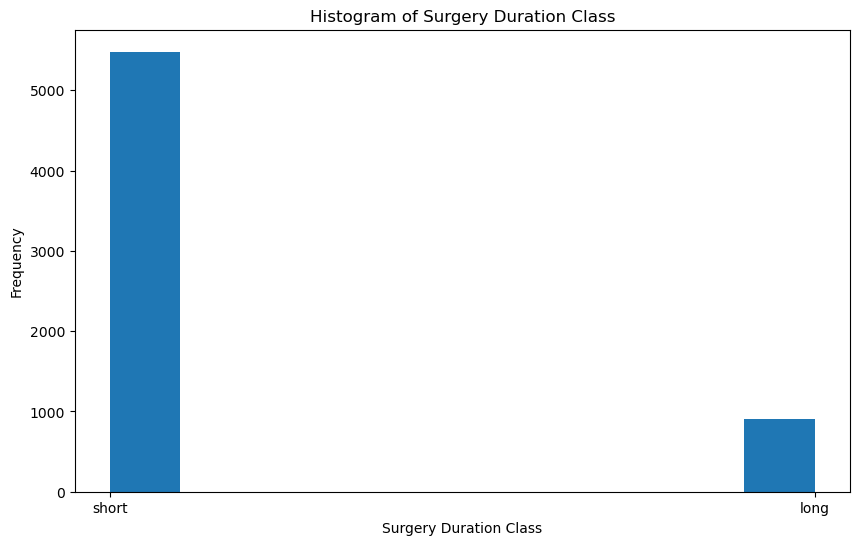

(8159.127739511584, 36841271.19989899)


D:\Anaconda\Lib\site-packages\numpy\linalg\linalg.py:2550: RuntimeWarning: overflow encountered in scalar add
  ret = add.reduce(absx, axis=axis, keepdims=keepdims)


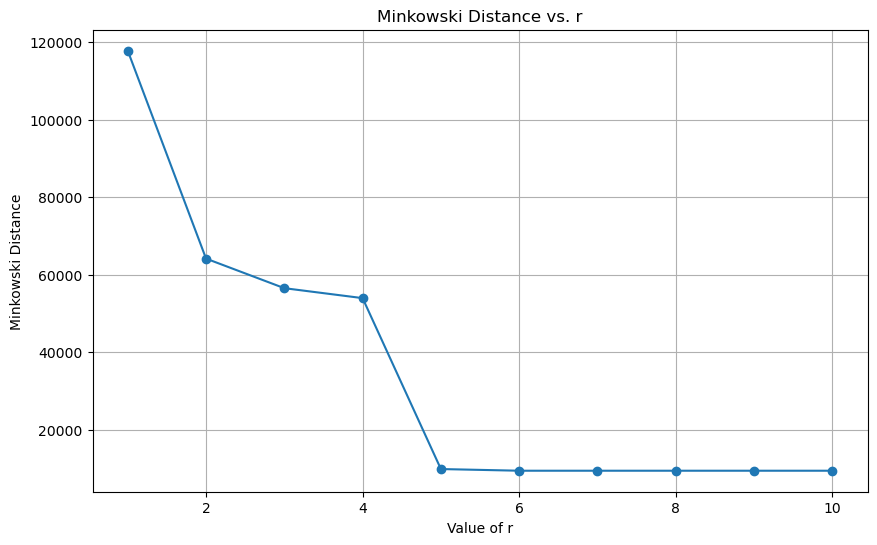

[117811.0, 64137.335468508514, 56503.709769658635, 53935.79443507079, 9806.178406471668, 9373.998094423356, 9373.99999810418, 9374.00000000014, 9373.999999999995, 9374.000000000005]


In [4]:

print(a1(dfCases))

print(a2(dfCases))
print(a3(dfCases))
